In [0]:
!pip install pandas
!pip install folium
!pip install geopandas

In [0]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQa7xqdHPBv0l001dydV5JuDvAaUh7um07FkH3YVntOj-v43BxUcZnK3L0XgqFUXncfSA38IM77hU14/pub?gid=794529442&single=true&output=csv")
df2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRELikdBBJHlgSjMkGjNP6CQL5VwxrD92vVIdMDAfi58x3VHJG0dY7SjhvhGOdt-0b42b08j-YlDBY8/pub?output=csv")
df2.head()

,lng,lat,Label
0,-78.7439,35.87432,Ebenezer Church
1,-78.8161,35.88265,Pleasant Grove Church
2,-78.7478,35.88459,Raleigh Christian Life Fellowship Church
3,-78.7778,35.88737,Mount Herman Church
4,-78.9903,35.88765,Barbees Church


In [0]:
def make_point(row):
    return Point(row.lng, row.lat)

def make_marker(row):
  return Markers(row.Label)
  
pointsL = df.apply(make_point, axis=1)
pickupLocations = gpd.GeoDataFrame(df, geometry=pointsL)
pickupLocations.crs = {'init': 'epsg:4326'}
pickupLocations.head()
pointsC = df2.apply(make_point, axis=1)
churchLocations = gpd.GeoDataFrame(df2, geometry=pointsC)
churchLocations.crs = {'init': 'epsg:4326'}
churchLocations.head()


,lng,lat,Label,geometry
0,-78.7439,35.87432,Ebenezer Church,POINT (-78.7439 35.87432)
1,-78.8161,35.88265,Pleasant Grove Church,POINT (-78.81610000000001 35.88265)
2,-78.7478,35.88459,Raleigh Christian Life Fellowship Church,POINT (-78.7478 35.88459)
3,-78.7778,35.88737,Mount Herman Church,POINT (-78.7778 35.88737)
4,-78.9903,35.88765,Barbees Church,POINT (-78.9903 35.88765)


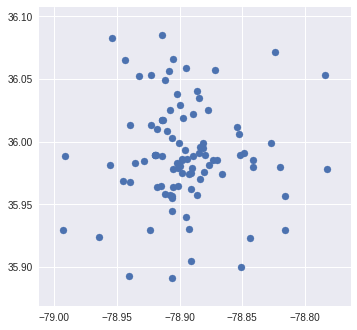

In [0]:
pickupLocations.plot()

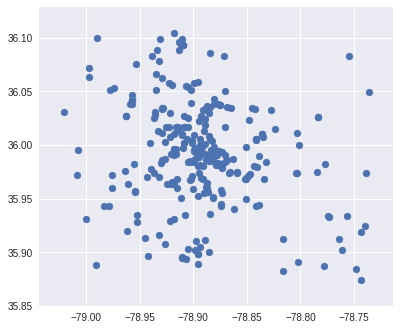

In [0]:
churchLocations.plot()

In [88]:
bounds = folium.GeoJson(churchLocations).get_bounds()
center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
m = folium.Map(
  location=center,
  zoom_start=12,
  tiles='OpenStreetMap'  
)

# Red markers are churches
# for index, row in churchLocations.iterrows():
#   folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='red', fill_color='red').add_to(m)

# Blue markers are 2018 pickup locations
for index, row in pickupLocations.iterrows():
  folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='blue', fill_color='blue').add_to(m)

m